## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, we will analyse the results of an A/B test run by an e-commerce website.  the goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [5]:
converted = df.query("converted == 1").nunique()[0] / df.nunique()[0]
converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').count()[0] + df.query('group != "treatment" and landing_page == "new_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. create a new dataset that meets the specifications.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" and landing_page == "new_page" ) | ( group == "control" and landing_page == "old_page")')
df2 = df2.reset_index()
df2.shape

(290585, 6)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

index           290585
user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2["user_id"].duplicated() == True].user_id

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2["user_id"].duplicated() == True]

,index,user_id,timestamp,group,landing_page,converted
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2[(df2["index"] != 2893)]
df2.shape

(290584, 6)



a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
prob = df2.query('converted == 1').count()[0] / df2.count()[0]
prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.query('group == "control" & converted == 1').count()[0] / df2.query('group == "control"').count()[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query('group == "treatment" & converted == 1').count()[0] / df2.query('group == "treatment"').count()[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2.query('landing_page == "new_page"').count()[0] / df2.count()[0]

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**we observe that the probability of converting for the old page viewers is higher than the new page viewers, which suggests that the old page  leads to more conversions **

<a id='ab_test'></a>
### Part II - A/B Test


null hypothess : **$p_{new}$** - **$p_{old}$** <= 0   
alternative hypothesis: **$p_{new}$** - **$p_{old}$** > 0  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.query('converted == 1').count()[0] / df2.count()[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.query('converted == 1').count()[0] / df2.count()[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
df2.query("landing_page == 'new_page'").count()[0]

145310

d. What is $n_{old}$?

In [21]:
df2.query("landing_page == 'old_page'").count()[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0,1],df2.query("landing_page == 'new_page'").count()[0], p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0,1],df2.query("landing_page == 'old_page'").count()[0], p=(p_old,1-p_old))
old_page_converted

array([0, 1, 0, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
pNew = ((new_page_converted == 1) == True).sum() / new_page_converted.size
pOld = ((old_page_converted == 1) == True).sum() / old_page_converted.size
pNew - pOld

-0.000445436035253155

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [30]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],df2.query("landing_page == 'new_page'").count()[0], p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],df2.query("landing_page == 'old_page'").count()[0], p=(p_old,1-p_old))
    pNew = ((new_page_converted == 1) == True).sum() / new_page_converted.size
    pOld = ((old_page_converted == 1) == True).sum() / old_page_converted.size
    p_diffs.append(pNew - pOld)

(array([  1.00000000e+00,   1.10000000e+01,   1.51000000e+02,
          7.22000000e+02,   2.23000000e+03,   3.27400000e+03,
          2.49600000e+03,   9.23000000e+02,   1.77000000e+02,
          1.50000000e+01]),
 array([-0.00581388, -0.00477459, -0.0037353 , -0.002696  , -0.00165671,
        -0.00061742,  0.00042188,  0.00146117,  0.00250046,  0.00353976,
         0.00457905]),
 <a list of 10 Patch objects>)

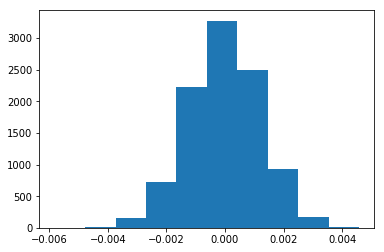

In [31]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [32]:
 # Create dataframe with all control records
obs_control_df = df.query('group == "control"')

# Compute completion rate
obs_control_ctr = obs_control_df.query('converted == 1').count()[0] / obs_control_df.count()[0]

# Create dataframe with all experiment records
obs_experiment_df = df.query('group == "treatment"')

# Compute completion rate
obs_experiment_ctr = obs_experiment_df.query('converted == 1').count()[0] / obs_experiment_df.count()[0]

# Compute observed difference in completion rates
obs_diff = obs_control_ctr - obs_experiment_ctr

# Display observed difference in completion rates
obs_diff

0.0014795997940775518

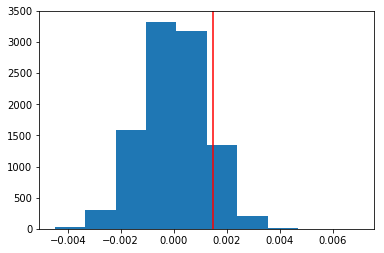

In [33]:
# create distribution under the null hypothesis
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)

# Plot the null distribution
plt.hist(null_vals)
plt.axvline(x=obs_diff,color="red")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# compute p value
(null_vals < obs_diff).mean()

0.88249999999999995

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**the value is called p-value ~(0.9) and since its large (being larger then type I error rate (0.05)) it suggests that the statstic came from the null hypohesis. this means that we can say with 95% confidence that there's no difference between the old and new pages**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == 1").count()[0]
convert_new = df2.query("landing_page == 'new_page' & converted == 1").count()[0]
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [47]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

In [48]:
p_value

0.90505831275902449

In [49]:
z_score

-1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since we have 95% confidance interval (critical value = 1.959963984540054) z-score (-1.3109241984234394) does not exceed the critical value (1.959963984540054) , we do not reject the null hypothesis that the difference between the two proportions is no different from zero. This is also supported by the p-value (0.90505831275902449) being larger then type I error rate (0.05) which suggests that the statstic came from the null hypohesis and that it is true. This result agrees with findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**since there's only two possible outcome, we will use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df3 = df2

In [35]:
df3['intercept'] = 1

In [36]:
df3['ab_page'] = np.where(df2['group']=="treatment", 1, 0)

In [37]:
df3.head()

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        23:05:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**It differs because this regression model is a two tailed test whereas the in Part II the test was one tailed. The null hypothesis assosiated with the regression is that the coefficient is equal to zero (no effect) and the page given to the user does not effect conversion. the alternative is that there is a difference. A low p-value (< 0.05) indicates that we can reject the null hypothesis. A large p-value (> 0.05) indicates that we do not reject the null hypothesis. which is the case here, p-value (0.190) means that the page is not significant to make difference.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**adding the day of week or duration of stay on page may influence whether a user converts or not, so adding other factors may lead to better model. However, there is some disadvantages of adding additional terms, as they might be correlated with other terms or with the dependant variable. Which will have negative impact**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('countries.csv')

In [41]:
df4 = df3.set_index('user_id').join(countries_df.set_index('user_id'))

In [42]:
df4['US'] = np.where(df4['country']=="US", 1, 0)
df4['UK'] = np.where(df4['country']=="UK", 1, 0)
df4.head()

,index,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
user_id,,,,,,,,,,
851104,0,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
804228,1,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
661590,2,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0
853541,3,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0
864975,4,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0


In [43]:
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'US', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        23:05:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**Based on the large p-values (0.129,0.074 > 0.05) , looks like the country does not effect whether an individual converts or not.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        23:05:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**Nothing is really changing, p-values have been slightly changed but still, both page and country do not effect the conversion**
**I conclude with 95% confidence, that there is no significant difference in conversion based on whether an individual receives the old or new page, or his country.